# Introductie

Kaggle is een platform voor analytische competities met machine learning problemen. Het helpt bedrijven en organisaties om de beste modellen te verkrijgen voor het voorspellen en beschrijven van hun datasets. Tegenwoordig worden er veel producten online verkocht. Kleding heeft sterke seizoensprijzen en wordt sterk beïnvloed door merknamen, terwijl de prijs van elektronica beïnvloed wordt door productspecificaties.  De Kaggle opdracht ‘Mercari Price Suggestion Challenge’ wordt georganiseerd door Mercari, de grootste winkel software applicatie van Japan. Mercari biedt een manier voor iedereen om producten via hun mobiele apparaat te kopen en verkopen. Mercari wilt een nauwkeurige prijs suggestie bieden aan de verkopers. In deze competitie wordt er gevraagd om een algoritme te schrijven die automatisch de juiste productprijzen voorstelt gebaseerd op de productnaam, categorie, merknaam en ingevoerde product omschrijving.

# Data visualisatie

## Data overzicht

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

# Get train and test dataset
train = pd.read_csv("train.tsv", sep = "\t")
test = pd.read_csv("test.tsv", sep = "\t")

In [2]:
# Information about the train dataset
train.info()
train.describe()

# Example of first 5 entries in the train dataset
train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [3]:
# Information about the test dataset
test.info()
test.describe()

# Example of first 5 entries in the test dataset
test.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 7 columns):
test_id              693359 non-null int64
name                 693359 non-null object
item_condition_id    693359 non-null int64
category_name        690301 non-null object
brand_name           397834 non-null object
shipping             693359 non-null int64
item_description     693359 non-null object
dtypes: int64(3), object(4)
memory usage: 37.0+ MB


,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


De training set bevat 1482535 observaties en de test set bevat 693359 observaties.
De training set heeft zes variabelen net als de test dataset, als je train_id, test_id en price buiten beschouwing laat. De variabelen hebben verschillende types zoals, continuous, binary en categorical.
In de bovenstaande tabellen is te zien hoe de datasets er uit zien.

## Target Variable: Prijs

In [4]:
print(train.price.describe())

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64


In [5]:
print(train[train["price"] == 0].price.size)

874


In [6]:
train[train.price == 2009]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
760469,760469,NEW Chanel WOC Caviar Gold Hardware,1,Women/Women's Handbags/Shoulder Bag,Chanel,2009.0,0,"New with tag, box and dustbag but no receipt. ..."


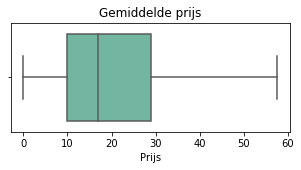

In [7]:
plt.figure(figsize = (5, 2))
sns.boxplot(x = train.price, showfliers = False, palette = "Set2")
plt.title('Gemiddelde prijs')
plt.xlabel('Prijs')
plt.show()

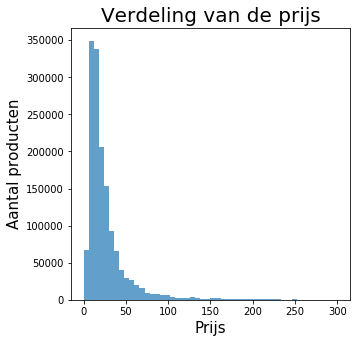

In [8]:
plt.figure(figsize = (5, 5))
plt.hist(train.price,bins = 50,range = [0, 300], alpha = 0.7)
plt.title('Verdeling van de prijs', fontsize = 20)
plt.ylabel('Aantal producten', fontsize = 15)
plt.xlabel('Prijs', fontsize = 15)
plt.show()

In [9]:
train['logprice'] = np.log(train.price+1)

In [10]:
train.head(2)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,logprice
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2.397895
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292


In [11]:
print(train.logprice.describe())

count    1.482535e+06
mean     2.979059e+00
std      7.492094e-01
min      0.000000e+00
25%      2.397895e+00
50%      2.890372e+00
75%      3.401197e+00
max      7.605890e+00
Name: logprice, dtype: float64


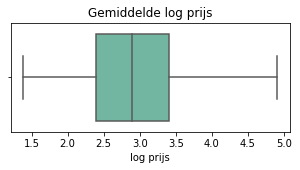

In [12]:
plt.figure(figsize = (5, 2))
sns.boxplot(x = train.logprice, showfliers = False, palette = "Set2")
plt.title('Gemiddelde log prijs')
plt.xlabel('log prijs')
plt.show()

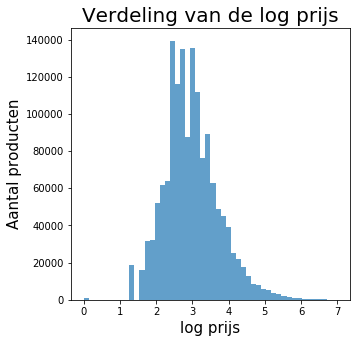

In [13]:
plt.figure(figsize = (5, 5))
plt.hist(train.logprice,bins = 50, range = [0, 7], alpha = 0.7)
plt.title('Verdeling van de log prijs', fontsize = 20)
plt.ylabel('Aantal producten', fontsize = 15)
plt.xlabel('log prijs', fontsize = 15)
plt.show()

De prijs van het product is het doel variabele dat aan de hand van een machine learning algoritme voorspelt moet worden. Het duurste product is de NEW Chanel WOC Caviar Gold Hardware schoudertas die verkocht is voor 2009 USD.  874 producten zijn gratis verkocht. De gemiddelde prijs 26,73USD, maar door de prijzen van dure producten is de verdeling van de variabelen sterk naar links. Door middel van een log-transformatie komt de prijs wat meer in het midden te liggen. De gemiddelde van de log prijs is 2.98.

## Product naam

In [14]:
# Get number of unique product names
print (train.name.value_counts().size)

1225273


Van de 1482535 observaties in de trainingset hebben 1225273 producten verschillende namen. Dit betekent dat de productnamen niet uniek zijn en dat er van een bepaald product meerder exemplaren aangeboden worden.

## Staat van het product

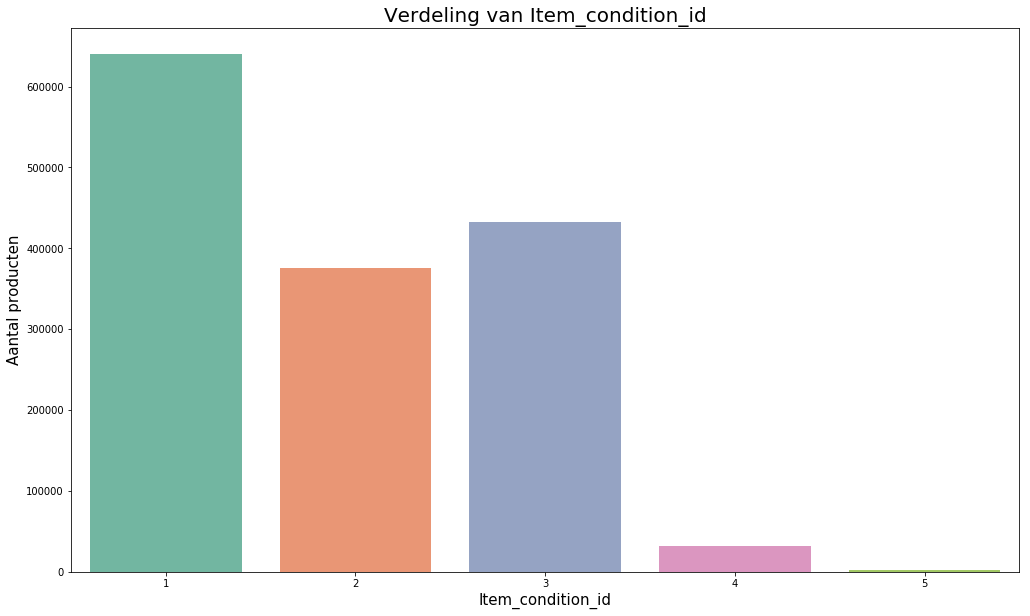

In [15]:
# Plot distribution of conditions
total = float(len(train.item_condition_id))

plt.figure(figsize=(17,10))
ax = sns.countplot(train.item_condition_id, palette="Set2")

plt.title('Verdeling van Item_condition_id', fontsize = 20)
plt.ylabel('Aantal producten', fontsize = 15)
plt.xlabel('Item_condition_id', fontsize = 15)
plt.show()

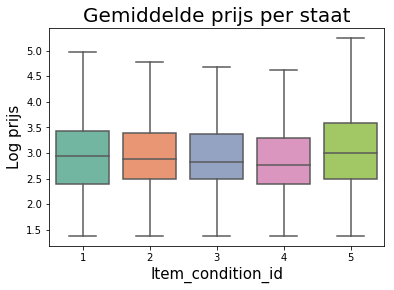

In [16]:
sns.boxplot(x=train.item_condition_id, y = train.logprice,showfliers=False, orient = 'v', palette="Set2")
plt.title('Gemiddelde prijs per staat', fontsize = 20)
plt.xlabel('Item_condition_id', fontsize = 15)
plt.ylabel('Log prijs', fontsize = 15)
plt.show()

In [17]:
print(train.groupby(["item_condition_id"]).logprice.mean())

item_condition_id
1    2.972679
2    3.000738
3    2.975196
4    2.896014
5    3.092496
Name: logprice, dtype: float64


In [18]:
print(train.groupby(["item_condition_id"]).logprice.median())

item_condition_id
1    2.944439
2    2.890372
3    2.833213
4    2.772589
5    2.995732
Name: logprice, dtype: float64


De variabele item_condition_id heeft een waarde van 1 tot 5. Waarde 1 betekent dat het product nieuw is en waarde 5 betekent dat het producht slecht is. De meeste producten hebben een waarde van 1. Producten met een waarde van 4 en 5 zijn er relatief weinig. Als de waarde van item_condition_id laag is, zou deze een positieve correlatie met de prijs moeten hebben. Kijkend naar de grafiek klopt deze hypothese met uitzondering op waarde 5. Producten met waarde 5 hebben de hoogste prijs en producten met de waarde 1 hebben de volgende hoogste prijs. Voorwaarde 5 is een anomalie, omdat het de hoogste prijs heeft, maar ook het minst aantal producten. De schatting is dus het meest onzeker.

## Verzending

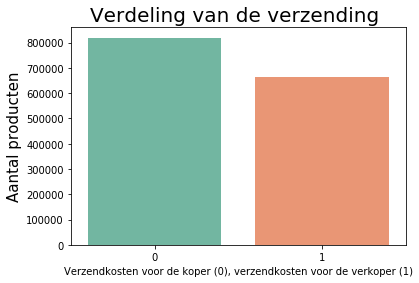

In [19]:
sns.countplot(x=train.shipping,palette="Set2")
plt.title('Verdeling van de verzending ', fontsize = 20)
plt.xlabel('Verzendkosten voor de koper (0), verzendkosten voor de verkoper (1)', fontsize = 10)
plt.ylabel('Aantal producten', fontsize = 15)
plt.show()

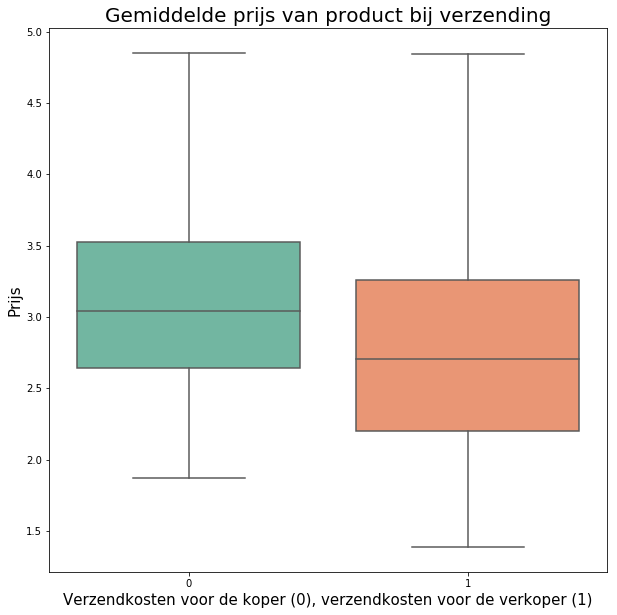

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(x=train.shipping, y = train.logprice, showfliers=False, orient = 'v',palette="Set2")
plt.title('Gemiddelde prijs van product bij verzending', fontsize = 20)
plt.xlabel('Verzendkosten voor de koper (0), verzendkosten voor de verkoper (1)', fontsize = 15)
plt.ylabel('Prijs', fontsize = 15)
plt.show()

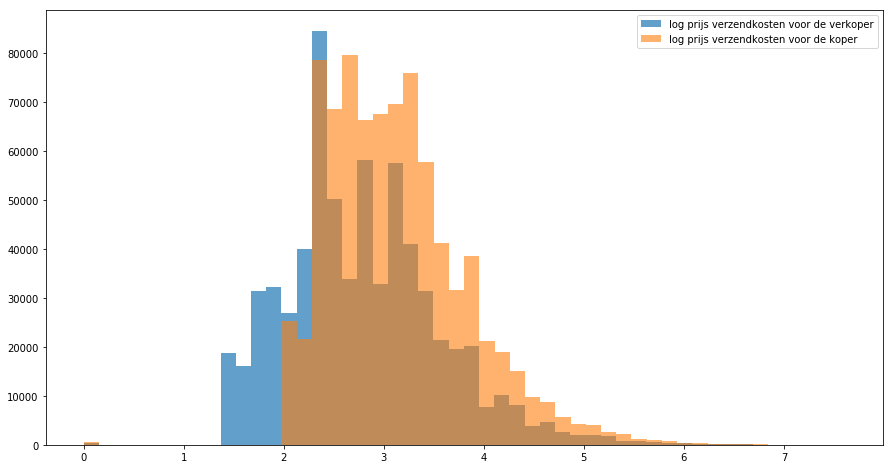

In [21]:
plt.figure(figsize = (15, 8))
plt.hist(train[train.shipping == 1].logprice, 
         bins = 50, alpha = 0.7, label = "log prijs verzendkosten voor de verkoper")
plt.hist(train[train.shipping == 0].logprice, 
         bins = 50, alpha = 0.6, label = "log prijs verzendkosten voor de koper")
plt.legend(fontsize = 10)
plt.show()

Het product betaald wordt door de koper en 1 betekent dat de verzendkosten betaald wordt door de verkoper. Van de meeste producten die gekocht zijn, heeft de koper zelf de verzendkosten betaald. Naar verwachting zou de prijs hoger liggen als de verzendkosten door de verkoper betaald zou worden, maar dit blijkt juist niet zo te zijn. De gemiddelde prijs bij waarde 1 ligt lager dan het gemiddelde bij waarde 0, dat betekent dat bij een hogere prijs de verzendkosten door de kopers betaald worden. In de grafiek is hier de verdeling van te zien per log prijs van het product.

## Merknaam

In [22]:
train[train.brand_name.isnull()].price.describe()

count    632682.000000
mean         21.133453
std          27.361260
min           0.000000
25%           9.000000
50%          14.000000
75%          24.000000
max        2000.000000
Name: price, dtype: float64

In [23]:
brands = train.brand_name.value_counts()
print(brands.size)

4809


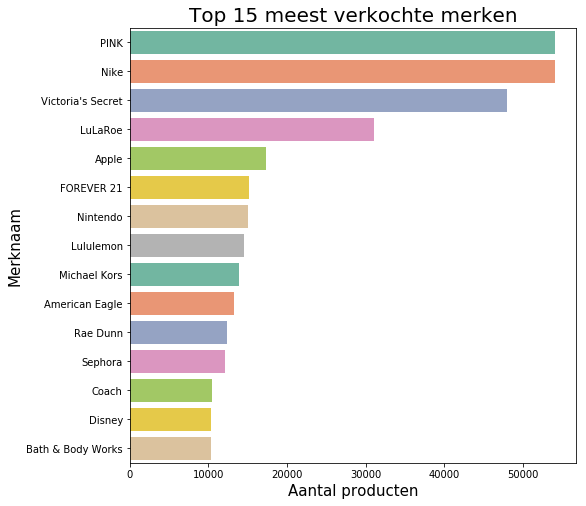

In [24]:
plt.figure(figsize=(8,8))
sns.countplot(y = train.brand_name, \
              order = train.brand_name.value_counts().iloc[:15].index, \
                                                      orient = 'v', palette="Set2")
plt.title('Top 15 meest verkochte merken', fontsize = 20)
plt.ylabel('Merknaam', fontsize = 15)
plt.xlabel('Aantal producten', fontsize = 15)
plt.show()

In [25]:
brand_mean_price = train.groupby(["brand_name"], as_index = True).mean().price.sort_values(ascending = False)
brand_mean_price_log = np.log(brand_mean_price+1)
print(" log mean price by brands", brand_mean_price_log[:10])

(' log mean price by brands', brand_name
Demdaco             6.063785
Proenza Schouler    6.026470
Auto Meter          5.843544
Oris                5.707110
MCM Worldwide       5.670480
Longines            5.541264
Vitamix             5.537772
Blendtec            5.532599
David Yurman        5.519906
Celine              5.479725
Name: price, dtype: float64)


In [26]:
brand_median_price = train.groupby(["brand_name"]).median().price.sort_values(ascending = False)
brand_median_price_log = np.log(brand_median_price+1)
print("log median price by brands", brand_median_price_log[:10])

('log median price by brands', brand_name
Demdaco                6.063785
Auto Meter             5.843544
Proenza Schouler       5.757323
Oris                   5.707110
Longines               5.541264
Blendtec               5.525453
Dainese                5.442418
Frédérique Constant    5.416100
David Yurman           5.398163
Vitamix                5.327876
Name: price, dtype: float64)


632682 producten hebben geen merk en de gemiddelde prijs van deze producten is 21.13 USD. Dat een product geen merk heeft, kan komen doordat het merk niet is in gevuld door de verkoper (missing values) of het product zelf merkloos is. 
Er zijn 4809 merken in totaal. In de tabel zijn de top 15 meest verkochte merken te zien. Op nummer één staat PINK. Het gemiddelde en mediaan van de log prijs zijn berekend en gesorteerd van hoog naar laag. In de tabel zijn de gemiddelde 10 duurste merken te zien.  

## Product categorieën

In [27]:
train['maincat'] = train.category_name.str.extract("([^/]+)/[^/]+/[^/]+")
train['cat1'] = train.category_name.str.extract("[^/]+/([^/]+)/[^/]+")
train['cat2'] = train.category_name.str.extract("[^/]+/[^/]+/([^/]+)")

In [28]:
train.head(2)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,logprice,maincat,cat1,cat2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2.397895,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts


In [29]:
print(train.category_name.isnull().sum())

6327


### Hoofd categorie

In [30]:
print(train.maincat.describe())

count     1476208
unique         10
top         Women
freq       664385
Name: maincat, dtype: object


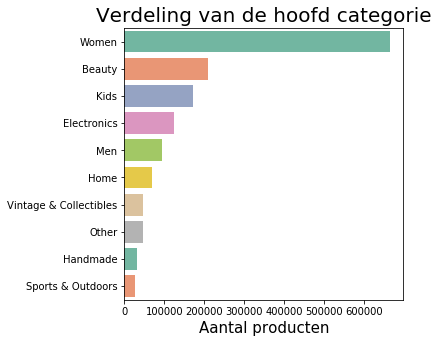

In [31]:
plt.figure(figsize = (5,5))
sns.countplot(y = train.maincat,order = train.maincat.value_counts().iloc[:15].index ,orient = 'h', palette="Set2")
plt.title ('Verdeling van de hoofd categorie', fontsize='20')
plt.xlabel('Aantal producten', fontsize='15')
plt.ylabel('')
plt.show()

In [32]:
maincat_mean_price = train.groupby(["maincat"], as_index = True).mean().price.sort_values(ascending = False)
maincat_mean_price_log = np.log(maincat_mean_price+1)
print(" log mean price by maincat", maincat_mean_price_log[:10])

(' log mean price by maincat', maincat
Electronics               3.588338
Men                       3.575392
Women                     3.397373
Vintage & Collectibles    3.344254
Sports & Outdoors         3.278360
Home                      3.240113
Other                     3.082360
Kids                      3.074650
Beauty                    3.028758
Handmade                  2.952646
Name: price, dtype: float64)


In [33]:
maincat_median_price = train.groupby(["maincat"], as_index = True).median().price.sort_values(ascending = False)
maincat_median_price_log = np.log(maincat_median_price+1)
print(" log mean price by maincat", maincat_median_price_log[:10])

(' log mean price by maincat', maincat
Men                       3.091042
Women                     2.995732
Home                      2.944439
Vintage & Collectibles    2.833213
Sports & Outdoors         2.833213
Electronics               2.772589
Beauty                    2.772589
Other                     2.708050
Kids                      2.708050
Handmade                  2.564949
Name: price, dtype: float64)


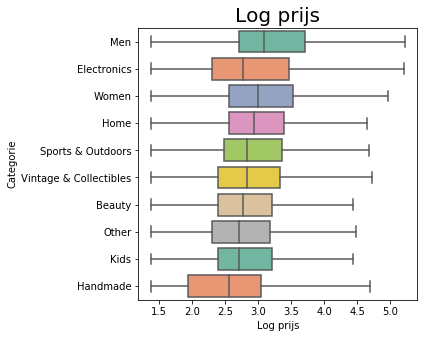

In [34]:
plt.figure(figsize = (5, 5))
sns.boxplot(x = train.logprice, y = train.maincat, showfliers=False, orient = "h", palette="Set2")
plt.title("Log prijs", fontsize = 20)
plt.ylabel("Categorie", fontsize = 10)
plt.xlabel("Log prijs", fontsize = 10)
plt.show()

### Eerste sub categorie

In [35]:
print(train.cat1.describe())

count              1476208
unique                 113
top       Athletic Apparel
freq                134383
Name: cat1, dtype: object


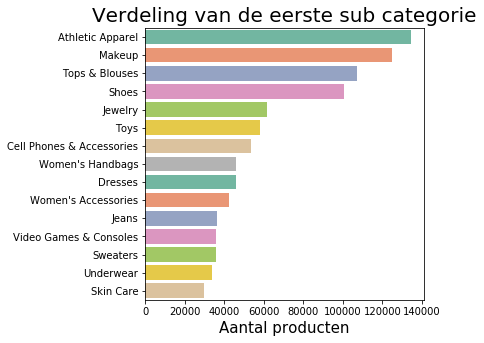

In [36]:
plt.figure(figsize = (5,5))
sns.countplot(y = train.cat1,order = train.cat1.value_counts().iloc[:15].index ,orient = 'h', palette="Set2")
plt.title ('Verdeling van de eerste sub categorie', fontsize='20')
plt.xlabel('Aantal producten', fontsize='15')
plt.ylabel('')
plt.show()

In [37]:
cat1_mean_price = train.groupby(["cat1"], as_index = True).mean().price.sort_values(ascending = False)
cat1_mean_price_log = np.log(cat1_mean_price+1)
print(" log mean price by cat1", cat1_mean_price_log[:10])

(' log mean price by cat1', cat1
Computers & Tablets         4.487374
Cameras & Photography       4.281430
Strollers                   4.223630
Bags and Purses             4.139811
Women's Handbags            4.080949
Musical instruments         3.864598
TV, Audio & Surveillance    3.810202
Footwear                    3.784148
Shoes                       3.756800
Golf                        3.752012
Name: price, dtype: float64)


In [38]:
cat1_median_price = train.groupby(["cat1"], as_index = True).median().price.sort_values(ascending = False)
cat1_median_price_log = np.log(cat1_median_price+1)
print(" log mean price by cat1", cat1_median_price_log[:10])

(' log mean price by cat1', cat1
Computers & Tablets         3.713572
Cameras & Photography       3.713572
Strollers                   3.610918
Women's Handbags            3.465736
Musical instruments         3.449988
Footwear                    3.433987
Suits                       3.433987
Shoes                       3.401197
Bags and Purses             3.367296
TV, Audio & Surveillance    3.295837
Name: price, dtype: float64)


### tweede sub categorie

In [39]:
print(train.cat2.describe())

count                     1476208
unique                        870
top       Pants, Tights, Leggings
freq                        60177
Name: cat2, dtype: object


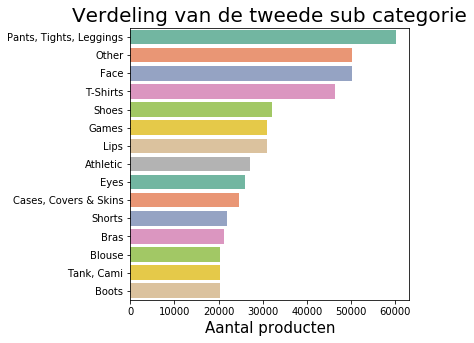

In [40]:
plt.figure(figsize = (5,5))
sns.countplot(y = train.cat2,order = train.cat2.value_counts().iloc[:15].index ,orient = 'h', palette="Set2")
plt.title ('Verdeling van de tweede sub categorie', fontsize='20')
plt.xlabel('Aantal producten', fontsize='15')
plt.ylabel('')
plt.show()

In [41]:
cat2_mean_price = train.groupby(["cat2"], as_index = True).mean().price.sort_values(ascending = False)
cat2_mean_price_log = np.log(cat2_mean_price+1)
print(" log mean price by cat2", cat2_mean_price_log[:10])

(' log mean price by cat2', cat2
Laptops & Netbooks           5.182284
Standard                     5.103923
Desktops & All-In-Ones       5.012829
Handbag                      4.945653
Travel Systems               4.833102
Air Conditioners             4.805191
Lightweight                  4.771626
Digital Cameras              4.730086
Satchel                      4.724059
Cell Phones & Smartphones    4.701475
Name: price, dtype: float64)


In [42]:
cat2_median_price = train.groupby(["cat2"], as_index = True).median().price.sort_values(ascending = False)
cat2_median_price_log = np.log(cat2_median_price+1)
print(" log mean price by cat2", cat2_median_price_log[:10])

(' log mean price by cat2', cat2
Standard                  4.983607
Air Conditioners          4.882802
Lightweight               4.663439
Laptops & Netbooks        4.615121
Women's Golf Clubs        4.615121
Travel Systems            4.564348
Satchel                   4.510860
Desktops & All-In-Ones    4.505350
Oils & Fluids             4.454347
Lenses & Filters          4.262680
Name: price, dtype: float64)


main, sub, subsub uitleggen uitelkaar gehaald en toegevoegd
hoeveel producten hebben geen cat
main cat bestaat uit 10 unieke women het meest
subcat1 113, athletic apparel
subcat2 870, pants, tights, leggings
gemiddelde en mediaan van elk ding berekent

## Product omschrijving

In [43]:
print(train.item_description.describe())

count                1482531
unique               1281426
top       No description yet
freq                   82489
Name: item_description, dtype: object


In [44]:
print(train.item_description.isnull().sum())

4


In [45]:
train['item_description'].str.len().describe()

count    1.482531e+06
mean     1.464758e+02
std      1.761138e+02
min      1.000000e+00
25%      4.000000e+01
50%      8.600000e+01
75%      1.750000e+02
max      2.144000e+03
Name: item_description, dtype: float64

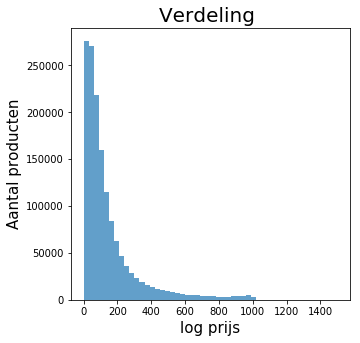

In [46]:
plt.figure(figsize = (5, 5))
plt.hist(train['item_description'].str.len(), bins = 50,range = [0, 1500], alpha = 0.7)
plt.title('Verdeling ', fontsize = 20)
plt.ylabel('Aantal producten', fontsize = 15)
plt.xlabel('log prijs', fontsize = 15)
plt.show()

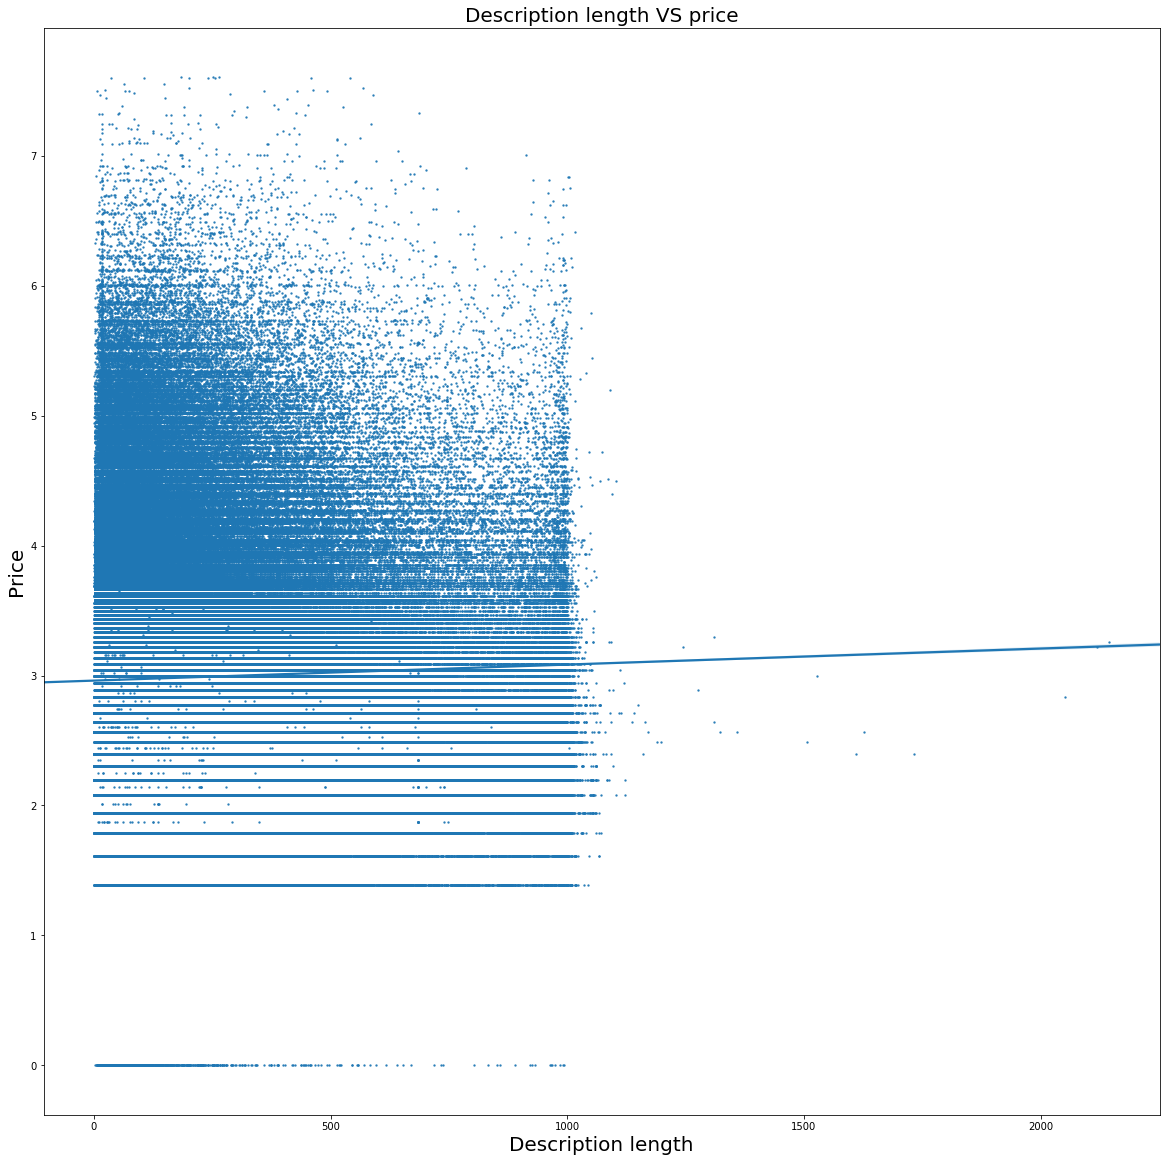

In [47]:
plt.figure(figsize=(20,20))
sns.regplot(x =train['item_description'].str.len(),y=train.logprice, scatter_kws={'s':2})
plt.title ('Description length VS price', fontsize = 20)
plt.xlabel('Description length', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
plt.show()

hoeveelheid met no description yet, 4 missing values